#<font color='navy' size=6pt> Rgularization Methods: Ridge, Lasso and Elastic Net

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.preprocessing import StandardScaler

## When Multiple Regression Fails

Plain *vanilla* multiple linear regression (OLS) fails if the number of observations is smaller than the number of features.


Example: If the dependent variable is the Sales Price, we cannot uniquely determine the weights for the features if we have only 4 observations.


    Dist to School     Property Area       Housing Area         Value       Property Tax     Bathrooms   Sales Price   
------------------  ----------------      -------------      --------      -------------   -----------  ------------
              7.0               0.4               1800           234                9.8            2.0         267.5
              2.3               0.8               1980           244               10.5            2.5         278.2
              4.3               1.1               2120           252               16.2            3.0         284.5
              3.8               0.6               2500           280               18.4            3.5         310.4
              

In [ ]:
df1 = pd.read_csv('drive/MyDrive/Colab Notebooks/dat.csv')

In [ ]:
df1

,Dist. to School,Prop. Area,Housing Area,Value,Prop. Tax,Bathrooms,Sales Price
0,7.0,0.4,1800,234,9.8,2.0,267.5
1,2.3,0.8,1980,244,10.5,2.5,278.2
2,4.3,1.1,2120,252,16.2,3.0,284.5
3,3.8,0.6,2500,280,18.4,3.5,310.4


In [ ]:
Xf = df1.values
X = Xf[:,0:6]
y = Xf[:,-1]

In [ ]:
X.shape

(4, 6)

### Message: if the determinant of X^T * X is zero then we have a rank deficient situation and multiple regression via OLS is NOT working !!!!!

In [ ]:
# let's check the determinant first
M = np.dot(np.transpose(X),X)
np.linalg.det(M)

0.0

In [ ]:
np.linalg.inv(M)

LinAlgError: ignored

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.coef_

array([ 0.05403601, -0.08762454,  0.03884158,  0.43500068, -0.46942783,
       -0.04774555])

In [ ]:
import statsmodels.api as sm

In [ ]:
model1 = sm.OLS(y, X)
results = model1.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Tue, 05 Oct 2021   Prob (F-statistic):                nan
Time:                        12:18:27   Log-Likelihood:                 103.80
No. Observations:                   4   AIC:                            -199.6
Df Residuals:                       0   BIC:                            -202.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.7187        inf         -0        n

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1648: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1649: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1578: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


## <font color= 'blue'> What does Rank Deficiency means and why we need Regularization</font>

The assumption for multiple linear regression is

$$\large
Y = X\beta + \sigma \epsilon
$$

where $\sigma$ is the standard deviatin of the noise. Further, we assume that the "noise" $\epsilon$ is independent and identically distributed with a zero mean.

We believe that the output is a linear combination of the input features.

Thus, if we would like to solve for the "weights" $\beta$ we may consider

$$\large
X^tY = X^tX\beta+\sigma X^t\epsilon
$$

And if the matrix $X^tX$ is invertible then we can solve for expected value of $\beta$:

$$\large
\mathbb{E}(\beta) = (X^tX)^{-1}X^t Y
$$

We can show by using *Linear Algebra* that the OLS solution obtained form minimizing the sum of the square residuals is equivalent.

###<font color='green'> We can test whether the matrix $X^tX$ is invertible by simply computing its determinant and checking that it is not zero.

###<font color='crimson'> IMPORTANT: When the matrix $X^tX$ is not invertible we cannot apply this method to get $\mathbb{E}(\beta)$. In this case if we minimize the sum of the squared residuals the algorithm cannot find just *one* best solution.</font>


## <font color= 'blue'> Possible causes for Rank Defficiency</font>



*   a situation when the number of independent observations is less than the number of features (in this case there is likely to have "spurious" correlations). https://www.tylervigen.com/spurious-correlations
*   the presence of truly correlated features.



## <font color='blue'>A solution for rank defficient Multiple Linear Regression: Regularization</font>

###<font color='violet'> Main Idea: minimize the sum of the square residuals plus a constraint on the vector of weights</font>
The Ridge model (also known as the *Tikhonov regularization*) consists of *learning* the weights by the following optimization:

$$\text{minimize} \frac{1}{n}\sum_{i=1}^{n}\left(\text{Residual}_i\right)^2 + \alpha \sum\limits_{j=1}^{p}\beta_j^2$$

where $alpha$ is a constant that can be adjusted based on a feedback loop so it is a hyperparameter.

This optimization is equivalent to minimizing the sum of the square residuals with a constraint on the sum of the squared weights

$$\text{minimize} \frac{1}{n}\sum_{i=1}^{n}\left(\text{Residual}_i\right)^2$$

subject to 

$$
 \sum\limits_{j=1}^{p}\beta_j^2 < M
$$

## <font color= 'blue'> L2 Regularization </font>

The L2 norm is 

$$
\|\beta\|_2:=\sqrt{\sum_{j=1}^{p}\beta_j^2}
$$

The Ridge model (also known as the *Tikhonov regularization*) consists of *learning* the weights by the following optimization:

$$\text{minimize} \frac{1}{n}\sum_{i=1}^{n}\left(\text{Residual}_i\right)^2 + \alpha \sum\limits_{j=1}^{p}\beta_j^2$$

where $alpha$ is a constant that can be adjusted based on a feedback loop so it is a hyperparameter.

The hyperparameter $\alpha$ is becoming a "tunning" parameter.

This optimization is equivalent to minimizing the sum of the square residuals with a constraint on the sum of the squared weights

$$\text{minimize} \frac{1}{n}\sum_{i=1}^{n}\left(\text{Residual}_i\right)^2$$

subject to 

$$
 \sum\limits_{j=1}^{p}\beta_j^2 < M
$$

## <font color= 'navy'> L1 Regularization </font>

The L1 norm is 

$$
\|\beta\|_1:=\sum_{j=1}^{p}|\beta_j|
$$

The Lasso model  consists of *learning* the weights by the following optimization:

$$\text{minimize} \frac{1}{n}\sum_{i=1}^{n}\left(\text{Residual}_i\right)^2 + \alpha \|\beta\|_1$$

where $alpha$ is a constant that can be adjusted based on a feedback loop so it is a hyperparameter.

This optimization is equivalent to minimizing the sum of the square residuals with a constraint on the sum of the squared weights

$$\text{minimize} \frac{1}{n}\sum_{i=1}^{n}\left(\text{Residual}_i\right)^2$$

subject to 

$$
 \sum\limits_{j=1}^{p}|\beta_j| < M
$$

## <font color='blue'> The difference between L1 and L2 norms </font>

In the following example the L2 norm of the vector $\vec{AB}$ is 5 and the L1 norm is $4+3=7$.

<figure>
<center>
<img src='https://drive.google.com/uc?id=1IIy5df8JcgHcI8oWxJbze9PiW_cUaIZD' 
width='550px' />
<figcaption>The difference between the L1 and L2 norms</figcaption></center>
</figure>


##<font color='blue'> Geometric comparison in 2D between L1 and L2 norms

<figure>
<center>
<img src='https://drive.google.com/uc?id=13uBQRlI_-LNfA8yLphY3fHChoEbjqOEW' 
width='500px' />
<figcaption>Difference between L1 and L2</figcaption></center>
</figure>


##<font color= 'blue'> Elastic Net Regularization </font>

Tha main idea is to combine the L2 and L1 regularizations in a *convex* way, such as:

$$
\lambda\cdot \sum\limits_{j=1}^{p}|\beta_j| + (1-\lambda)\cdot\sum\limits_{j=1}^{p}\beta_j^2
$$

Here $0\leq\lambda\leq1$, $\alpha$ is formulated via the ratio between the two penalties such as $\text{l1_ratio}=\frac{\lambda}{1-\lambda}$

The Elstic Net regularization consists of *learning* the weights by solving the following optimization problem:

$$\text{minimize} \frac{1}{n}\sum_{i=1}^{n}\left(\text{Residual}_i\right)^2 + \alpha\left( \lambda\cdot \sum\limits_{j=1}^{p}|\beta_j| + (1-\lambda)\cdot\sum\limits_{j=1}^{p}\beta_j^2\right)$$

So with this rgularization approach we have two hyperparameters that we need to decide on.

In [1]:
from sklearn.model_selection import train_test_split, KFold 
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from yellowbrick.regressor import ResidualsPlot


# Load a regression dataset, i.e. https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength
#df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls')
# we get the input and the output as numerical arrays
#y = df['Concrete compressive strength(MPa, megapascals) '].values
#X = df.loc[ : , df.columns != 'strength'].values

ModuleNotFoundError: No module named 'yellowbrick'

In [ ]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [ ]:
df = pd.read_csv('drive/MyDrive/Data Sets/concrete.csv')
X = df.loc[ : , df.columns != 'strength'].values
y = df['strength'].values

In [ ]:
df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [ ]:
y

array([79.98611076, 61.88736576, 40.26953526, ..., 23.69660064,
       32.76803638, 32.40123514])

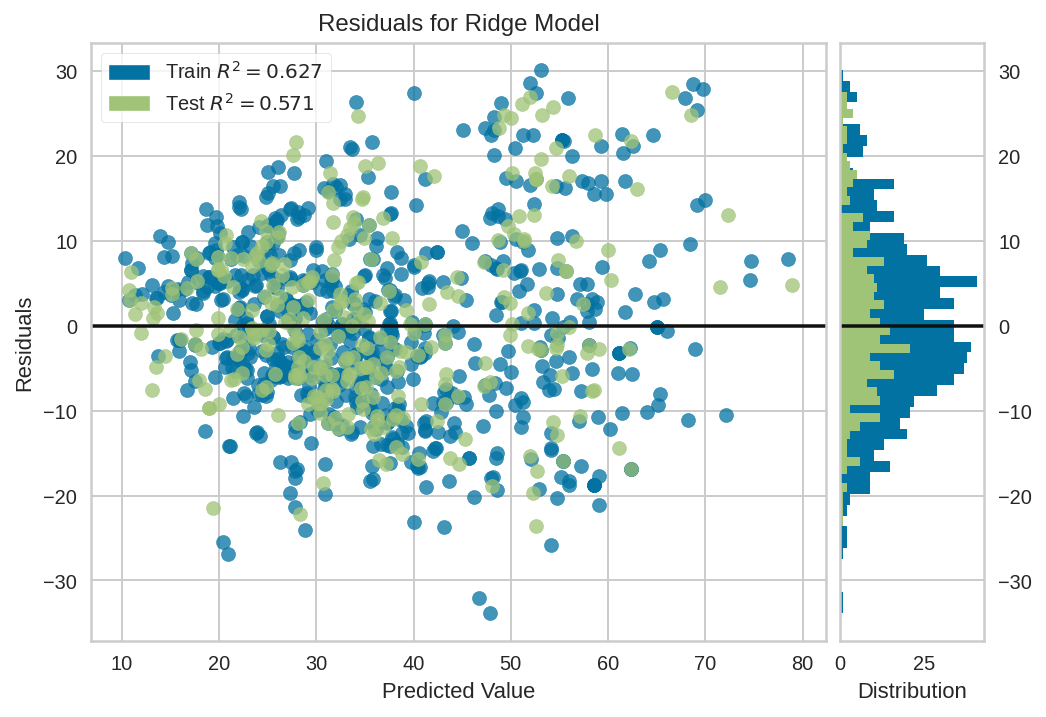

In [ ]:


# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=310)

# Instantiate the linear model and visualizer
model = Ridge(alpha=0.2)
#model = LinearRegression()
#model = Lasso(alpha=0.01)
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()

In [ ]:
R2_test = []
R2_train = []
MSE = []
kf = KFold(n_splits=10,shuffle=True,random_state=310)
alpha = 0.1
model = Ridge(alpha=alpha)

In [ ]:
for idx_train,idx_test in kf.split(X):
  X_train = X[idx_train,:]
  X_test = X[idx_test,:]
  y_train = y[idx_train]
  y_test = y[idx_test]
  model.fit(X_train,y_train)
  R2_test.append(model.score(X_test,y_test))
  R2_train.append(model.score(X_train,y_train))
# so we got 10 values for each R2_train and R2_test

In [ ]:
R2_train

[0.6159339164391283,
 0.6223236157448624,
 0.6178222336582222,
 0.611675253846039,
 0.6181881430320639,
 0.6163286442679681,
 0.6066710557505858,
 0.6248985075014506,
 0.6121008911250296,
 0.6139460798812626]

In [ ]:
R2_test

[0.6012253015051574,
 0.5349563419502408,
 0.5728588656043787,
 0.6434427738131093,
 0.5887069536147163,
 0.6029122287177627,
 0.686236506411215,
 0.5347148438604423,
 0.643156758397333,
 0.6235112779782546]

In [ ]:
np.abs(np.mean(R2_train)-np.mean(R2_test)) # here we want an alpha such that this value is as small as possible

0.012816648939400377

In [ ]:
df.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


In [ ]:
import seaborn as sns
sns.set(color_codes=True)


In [ ]:
model.predict(X)

array([54.1594083 , 54.40468258, 57.29684387, ..., 26.90045444,
       29.84015537, 32.62950731])

In [ ]:
residuals = y - model.predict(X)

In [ ]:
residuals*100

array([ 2583.05916983,   748.53174179, -1702.68438714, ...,
        -320.04544385,   292.98446257,   -22.95073122])

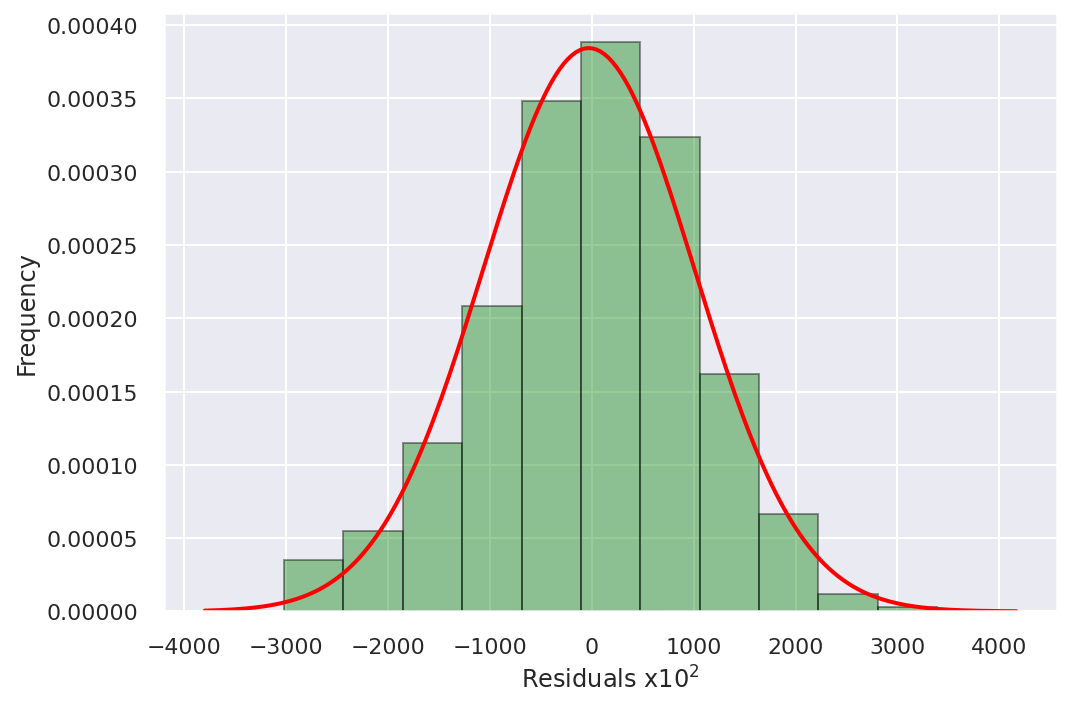

In [ ]:

ax = sns.distplot(residuals*100,                                        
                  bins=11,
                  kde=False,
                  color='deepskyblue',
                  hist_kws={'color':'green','edgecolor':'black','alpha':0.4},
                  fit=stats.norm,
                  fit_kws={'color':'red','lw':2})
ax.set(xlabel='Residuals x$10^2$', ylabel='Frequency')
ax.set_xscale('linear')
plt.show()

In [ ]:
# The Kolmogorov-Smirnov Test in a format interpretable with in the sense of classical hypothesis testing
stats.kstest((residuals-np.mean(residuals))/np.std(residuals),stats.norm.cdf)

KstestResult(statistic=0.03166960665774948, pvalue=0.24805851317581537)

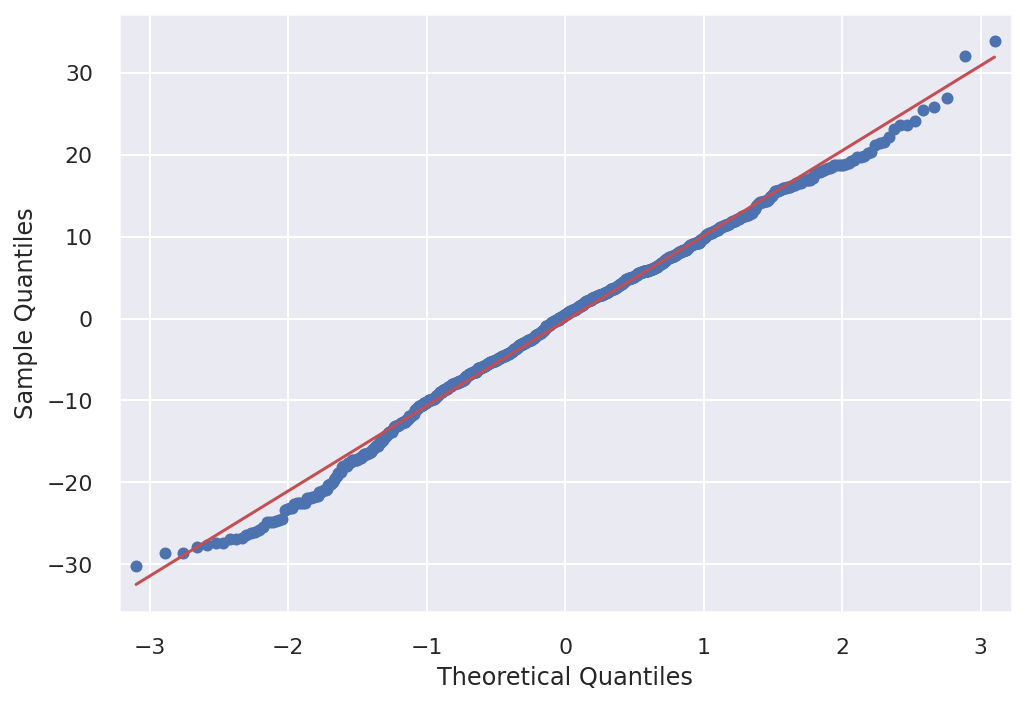

In [ ]:
import pylab
import statsmodels.api as sm
sm.qqplot(residuals, loc = 0, scale = 1, line='s')
pylab.show()